![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]
   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]
<class '

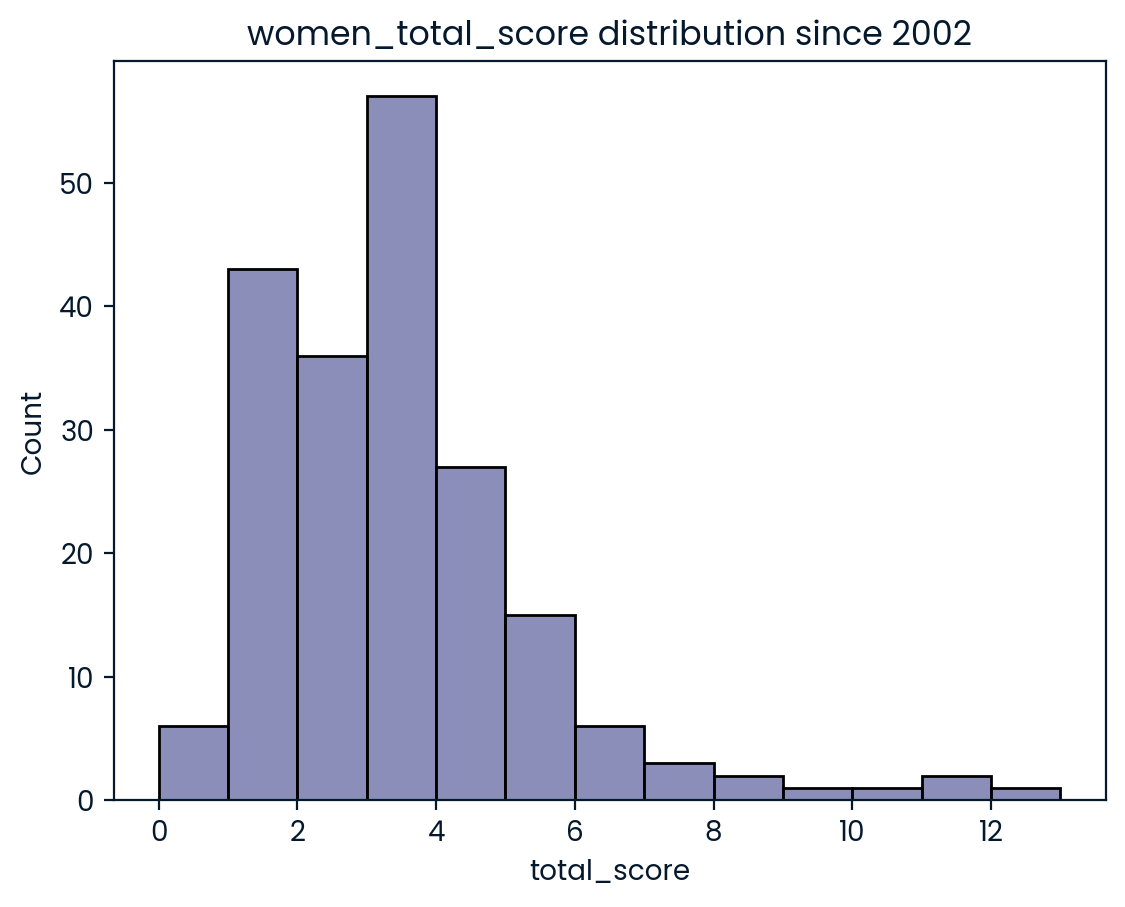

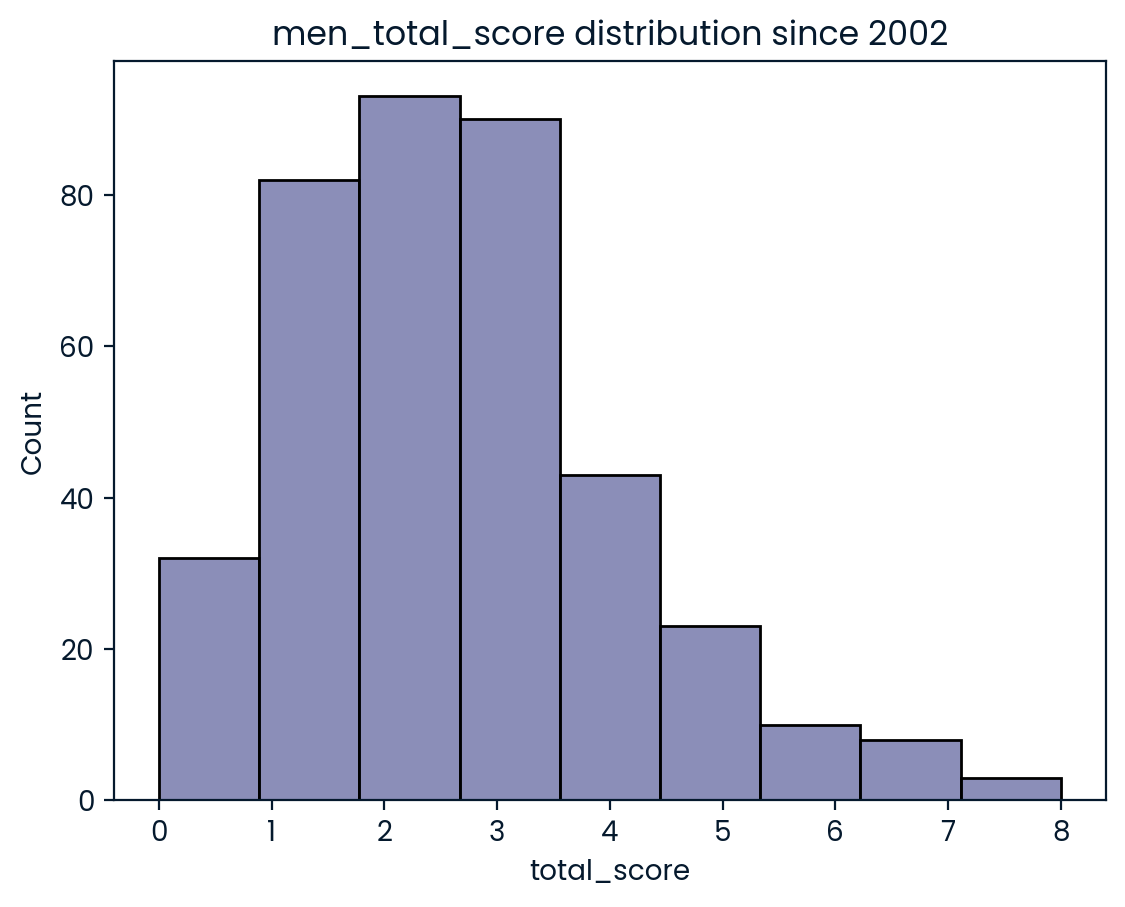

           date  total_score
1600 2003-09-20            3
1601 2003-09-20            2
1602 2003-09-20            5
1603 2003-09-20            6
1604 2003-09-21            4
...         ...          ...
4465 2019-06-29            3
4466 2019-07-02            3
4467 2019-07-03            1
4468 2019-07-06            3
4469 2019-07-07            2

[200 rows x 2 columns]
            date  total_score
25164 2002-05-31            1
25165 2002-06-01            8
25166 2002-06-01            2
25167 2002-06-01            3
25168 2002-06-02            1
...          ...          ...
44343 2022-12-10            3
44345 2022-12-13            3
44346 2022-12-14            2
44350 2022-12-17            3
44352 2022-12-18            6

[384 rows x 2 columns]
2.98
2.0173249614278803
2.5130208333333335
1.65039049658941
N1 = 200 N2 = 384
4.069599999999999 2.7237887912326393
1.4940952885551448
Ttest_indResult(statistic=2.9956678151313443, pvalue=0.002854981170433909)
               T  dof alternative  

In [28]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import mannwhitneyu
import pingouin as pg

# Read csv files
women = pd.read_csv('women_results.csv')
print(women.head())

men = pd.read_csv('men_results.csv')
print(men.head())


# Explore data
print(women.info())
print(men.info())

print(women.describe())
print(men.describe())

print(men.columns)
print(women.columns)

# Tournament categories
print(women['tournament'].value_counts())
print(men['tournament'].value_counts())

# Create a new column with 'total_score'
women['total_score'] = women['home_score'] + women['away_score']
men['total_score'] = men['home_score'] + men['away_score']

# Change 'date' to datetime format
women['date'] = pd.to_datetime(women['date'])
men['date'] = pd.to_datetime(men['date'])
print(women['date'].dtypes)
print(men['date'].dtypes)

#Select matches since 2002-01-01
filtered_women = women.loc[women['date'] >= '2002-01-01']
print(filtered_women)
filtered_men = men.loc[men['date'] >= '2002-01-01']
print(filtered_men)

#Select FIFA World Cup matches
women_FWC = women.loc[women['tournament'] == 'FIFA World Cup']
men_FWC = men.loc[men['tournament'] == 'FIFA World Cup']
print(women_FWC)
print(men_FWC)

#Select FIFA World Cup matches since 2002-01-01
women_FWC_2002 = women.loc[(women['tournament'] == 'FIFA World Cup') & (women['date'] >= '2002-01-01')]
print(women_FWC_2002)

men_FWC_2002 = men.loc[(men['tournament'] == 'FIFA World Cup') & (men['date'] >= '2002-01-01')]
print(men_FWC_2002)


#Distribution of my data
sns.histplot(data= women_FWC_2002['total_score'], bins=13).set_title('women_total_score distribution since 2002')
plt.show()

sns.histplot(data=men_FWC_2002['total_score'], bins=9).set_title('men_total_score distribution since 2002')
plt.show()

#Create new panda dataFrame with men and women total score, date - since 2002
women_total_score = pd.DataFrame(women_FWC_2002[['date', 'total_score']])
men_total_score = pd.DataFrame(men_FWC_2002[['date', 'total_score']])
print(women_total_score)
print(men_total_score)

#Mean number of goals scored in women or men international soccer matches since 2002
mean_W_FWC_2002 = women_FWC_2002['total_score'].mean()
print(mean_W_FWC_2002)
sd_W_FWC_2002 = np.std(women_FWC_2002['total_score'])
print(sd_W_FWC_2002)

mean_M_FWC_2002 = men_FWC_2002['total_score'].mean()
print(mean_M_FWC_2002)
sd_M_FWC_2002 = np.std(men_FWC_2002['total_score'])
print(sd_M_FWC_2002)

#t-test - allows comparison of two groups, but it originally hypothetise normal distribution
#H0 = population mean of the two groups is the same
alpha = 0.01

#Sample sizes
N1 = len(women_FWC_2002['total_score'])
N2 = len(men_FWC_2002['total_score'])
print("N1 = " + str(N1), "N2 = "+ str(N2))

#Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance. 
print(np.var(women_FWC_2002['total_score']), np.var(men_FWC_2002['total_score']))
print(np.var(women_FWC_2002['total_score']) / np.var(men_FWC_2002['total_score']))
#Hence the variance difference is less than 4, so equal_var=True

print(stats.ttest_ind(a=women_FWC_2002['total_score'], b=men_FWC_2002['total_score'], equal_var=True))

#t-test using pingouin
result = pg.ttest(women_FWC_2002['total_score'], men_FWC_2002['total_score'], correction=False)
print(result)
print(result['p-val'])

#Mann-Whithney-U test using pingouin
#Proper Hypothesis test for this project is Mann_Whitney_U test: a) two datasets are independent, b) The data is ordinal or continous but does not follow normal distribution, c) The distribution of the two groups have similar shape, d) Each sample should have at least 5 observations
alpha = 0.01

wmw_test = pg.mwu(x=women_FWC_2002['total_score'], y=men_FWC_2002['total_score'], alternative='greater')

print(wmw_test)



result_2 = ""
alpha = 0.01
if wmw_test['p-val'].item() < alpha:
    result_2 = "reject"
    print("reject")
else:
    result_2 = "fail to reject"
    print("fail to reject")
result_dict = {"p_val": wmw_test['p-val'].item(), "result": result_2}


print(wmw_test['p-val'])